In [1]:
# Загрузка модуля pandas
import pandas as pd
# Загрузка файла из облака в colab
import gdown
gdown.download('https://drive.google.com/uc?id=1HneSc4fEx4ayjOU2CwFMzr3pdWW3wK58', None, quiet=True)
data = pd.read_csv('dataset1.csv') # Создадаю переменную data, в которую с помощью функции pd.read_csv() загружаю данные из файла

In [2]:
data.head(4) # Ввыводим первые 4 строки

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [3]:
# Создайте копию датасета, чтобы избежать изменения оригинального
data_copy = data.copy()

# Замените значения в столбце 'Уверенность' в соответствии с условием, используя функцию apply
def fill_confidence(row):
    if row['Поставьте галочку, если уверены на 100%']:
        return '100%'
    if row['Если 75%']:
        return '75%'
    if row['Если 50%']:
        return '50%'
    return ''

data_copy['Уверенность_term'] = data_copy.apply(fill_confidence, axis=1)

# Получиаем индекс столбца "Ответ эксперта (Лактионов)"
expert_column_index = data_copy.columns.get_loc("Ответ эксперта (Лактионов)")

# Вставляем столбец 'Уверенность' после столбца "Ответ эксперта (Лактионов)"
data_copy.insert(expert_column_index + 1, 'Уверенность', data_copy['Уверенность_term'])

# Удалите временный столбец 'Уверенность_term', если он больше не нужен
data_copy = data_copy.drop('Уверенность_term', axis=1)
# Удалите ненужные столбцы
data_copy = data_copy.drop(['Поставьте галочку, если уверены на 100%', 'Если 75%', 'Если 50%'], axis=1)
# Теперь столбец 'Уверенность' находится после столбца "Ответ эксперта (Лактионов)"
# Выберем последние 4 столбца
last_four_columns = data_copy.iloc[:, -4:]

# Объединим их в новый столбец, например, с именем 'Ответ'
data_copy['Ответ (Препарат; Уверенность; Альтернатива; Комментарий)'] = last_four_columns.apply(lambda x: '; '.join(map(str, x)), axis=1)

# Удалим исходные столбцы по их заголовкам
data_copy = data_copy.drop(['id_ответа', 'Ответ эксперта (Лактионов)', 'Уверенность', 'Альтернатива, если 50% - обязательно', 'Комментарий'], axis=1)


In [5]:
data_copy

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ (Препарат; Уверенность; Альтернатива; Комментарий)
0,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб; 100%; 0; 0
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб; 100%; 0; 0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение; 75%; Дурвалумаб; Нет доказательной...
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб; 75%; 0; Возможно есть мутации и эф...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб; 75%; 0; Возможно есть мутации и эф...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение; 50%; Осимертиниб; Возможна низкая ...
248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение; 100%; 0; 0
248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб; 50%; Дурвалумаб; Возможна низкая эф...
248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб; 50%; Дурвалумаб; Возможна низкая эф...


## Анализ данных

In [6]:
data_copy.shape

(248832, 15)

In [7]:
data_copy.size

3732480

In [118]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Раса                                                      248832 non-null  object
 1   Пол                                                       248832 non-null  object
 2   Возраст                                                   248832 non-null  object
 3   Статус курения                                            248832 non-null  object
 4   ECOG                                                      248832 non-null  object
 5   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 6   Ко-мутации KRAS                                           248832 non-null  object
 7   Ко-мутации p53.                                           248832 non-null  object
 8   Ко-мутации STK

In [10]:
data_copy.describe()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ (Препарат; Уверенность; Альтернатива; Комментарий)
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,34
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение; 100%; 0; 0
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,46080


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Раса                                                      248832 non-null  object
 1   Пол                                                       248832 non-null  object
 2   Возраст                                                   248832 non-null  object
 3   Статус курения                                            248832 non-null  object
 4   ECOG                                                      248832 non-null  object
 5   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 6   Ко-мутации KRAS                                           248832 non-null  object
 7   Ко-мутации p53.                                           248832 non-null  object
 8   Ко-мутации STK

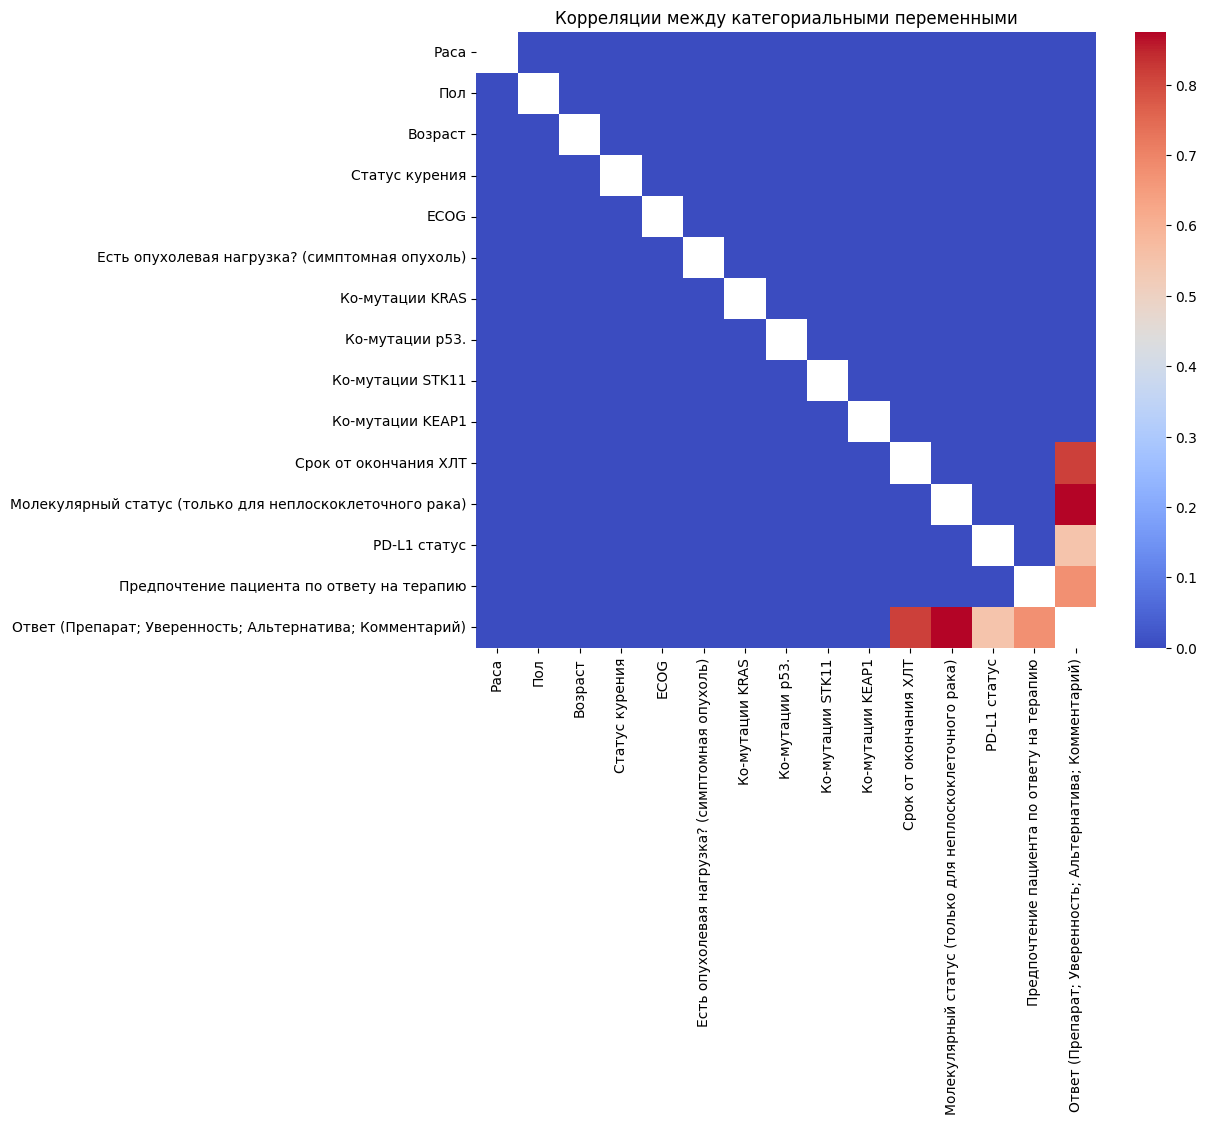

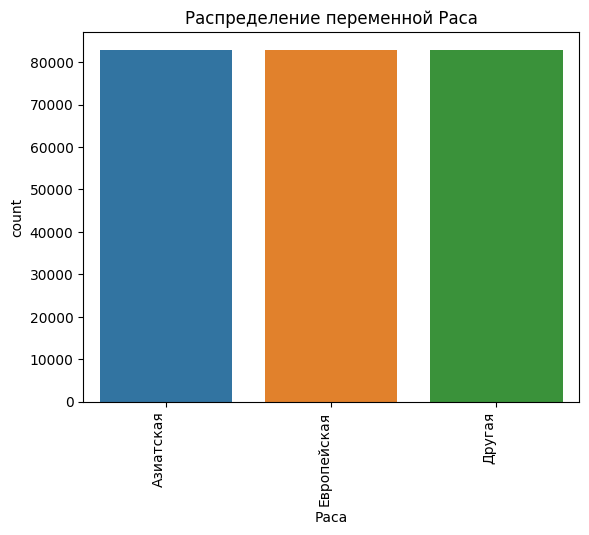

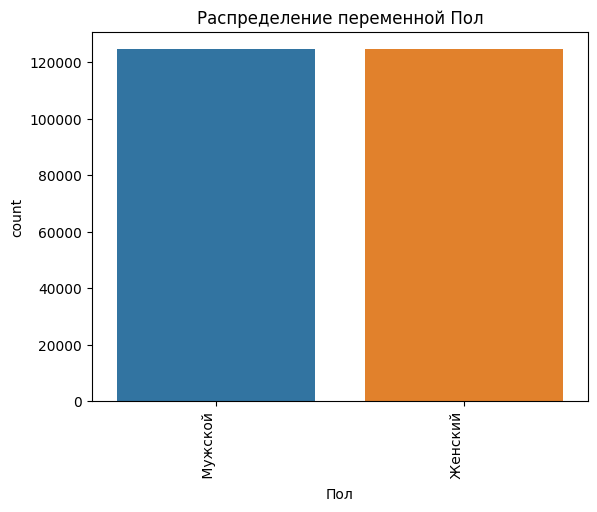

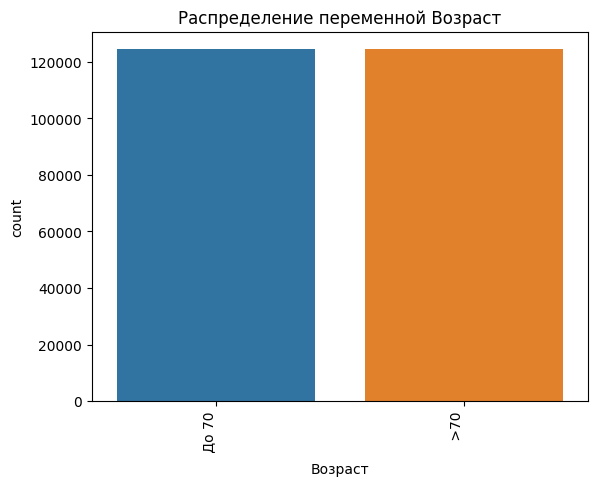

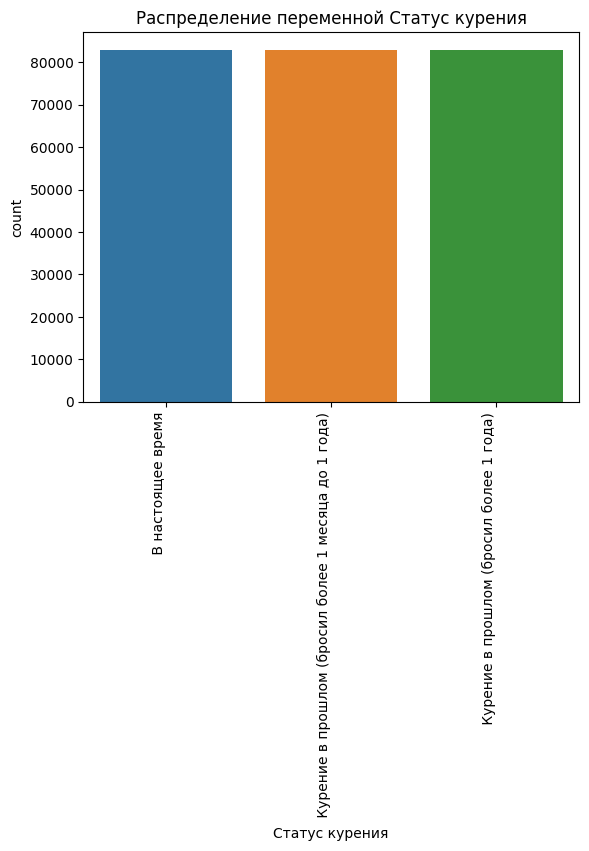

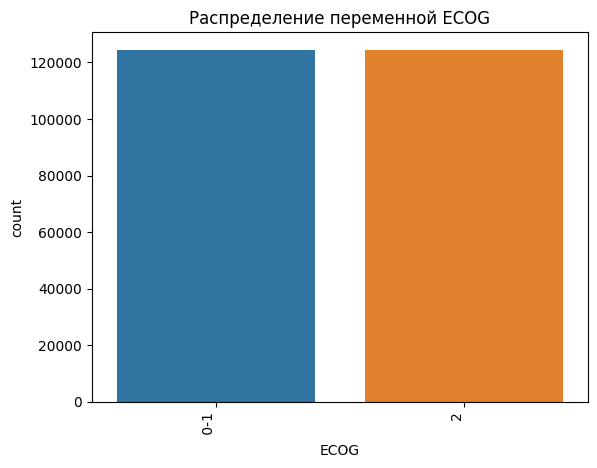

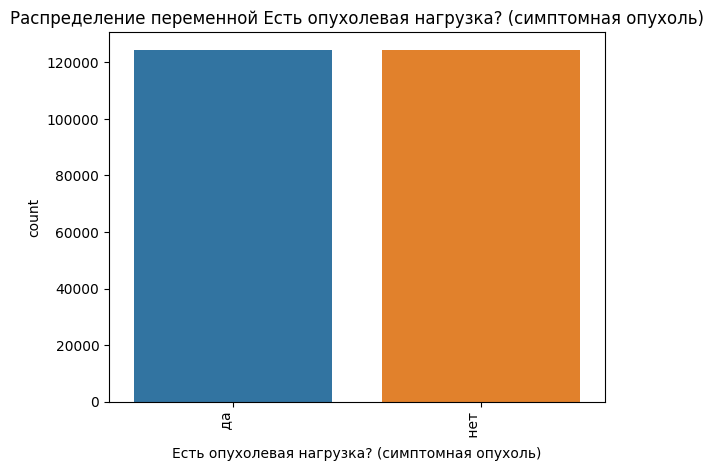

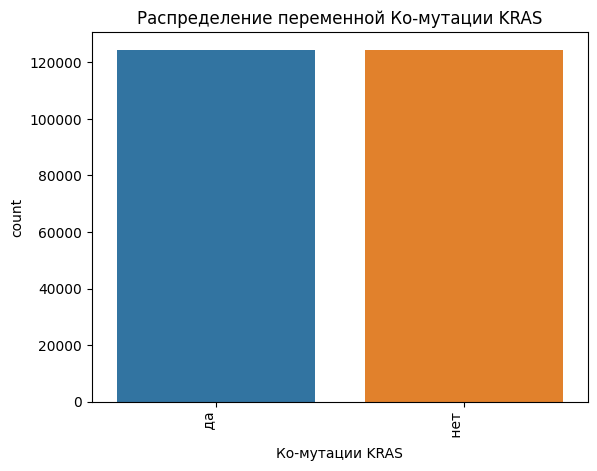

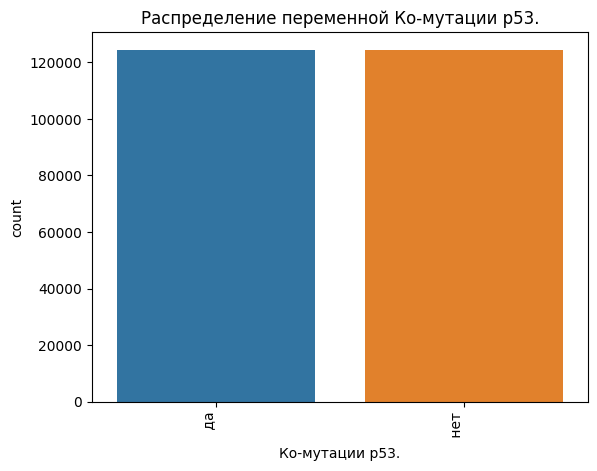

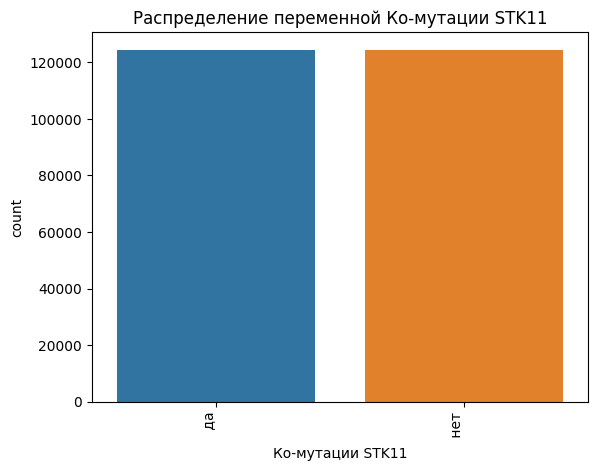

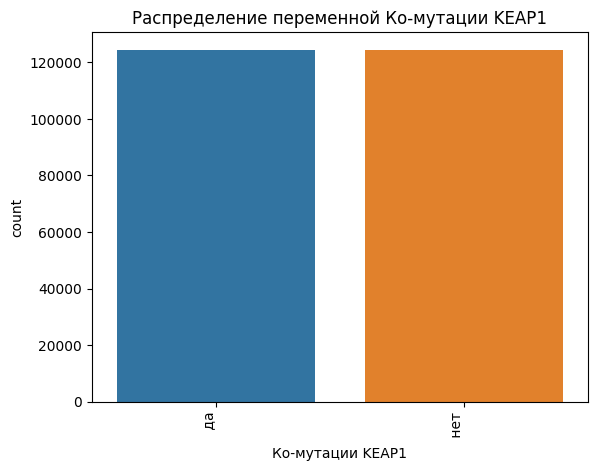

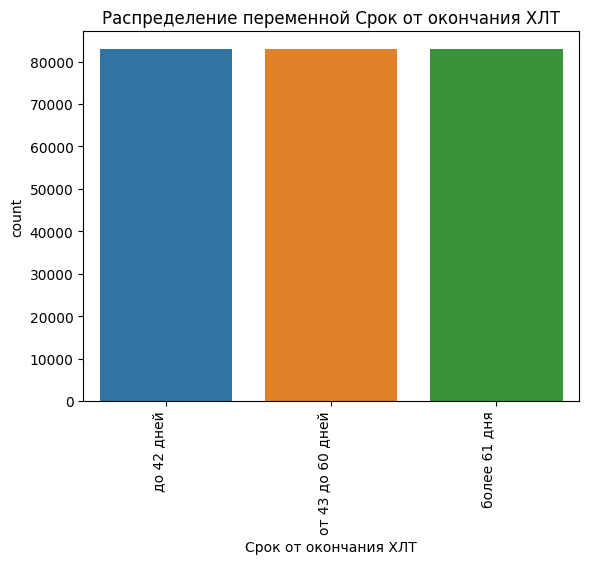

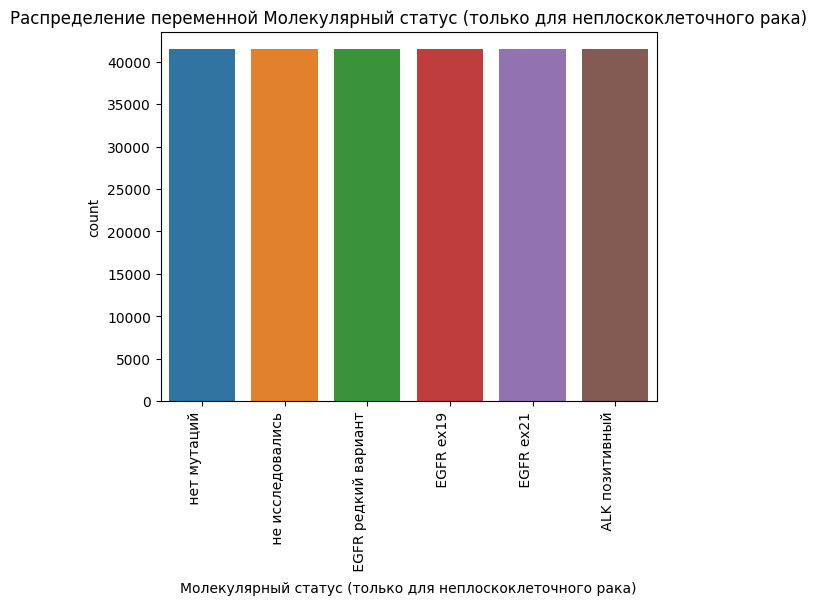

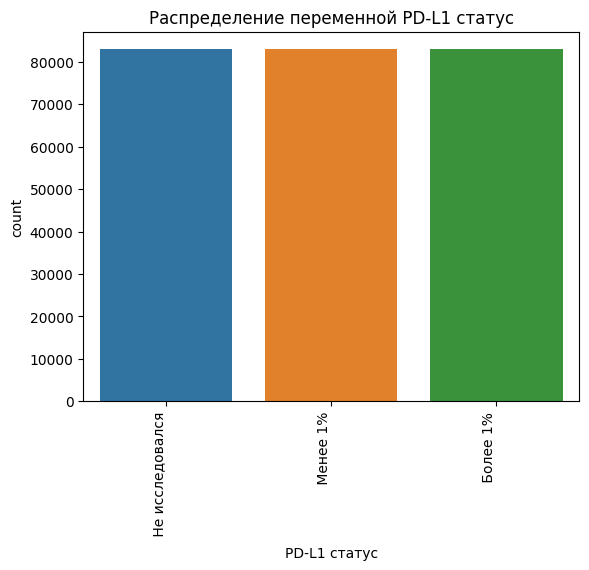

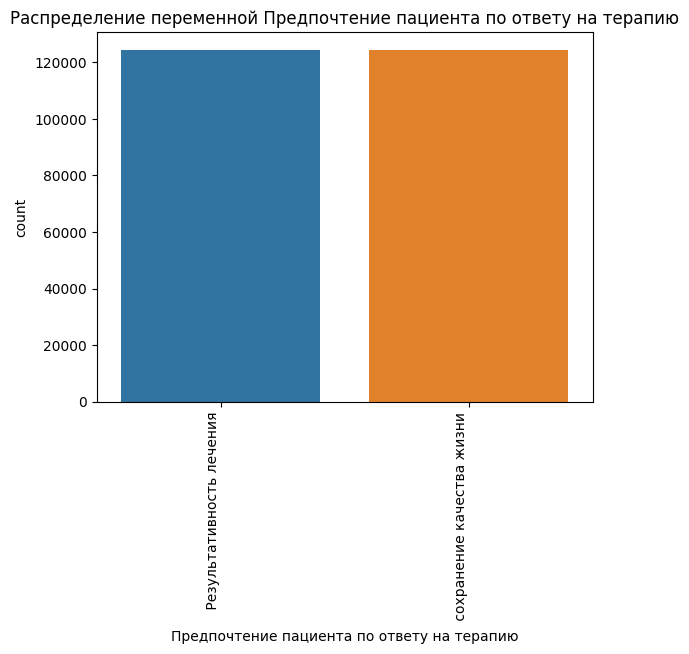

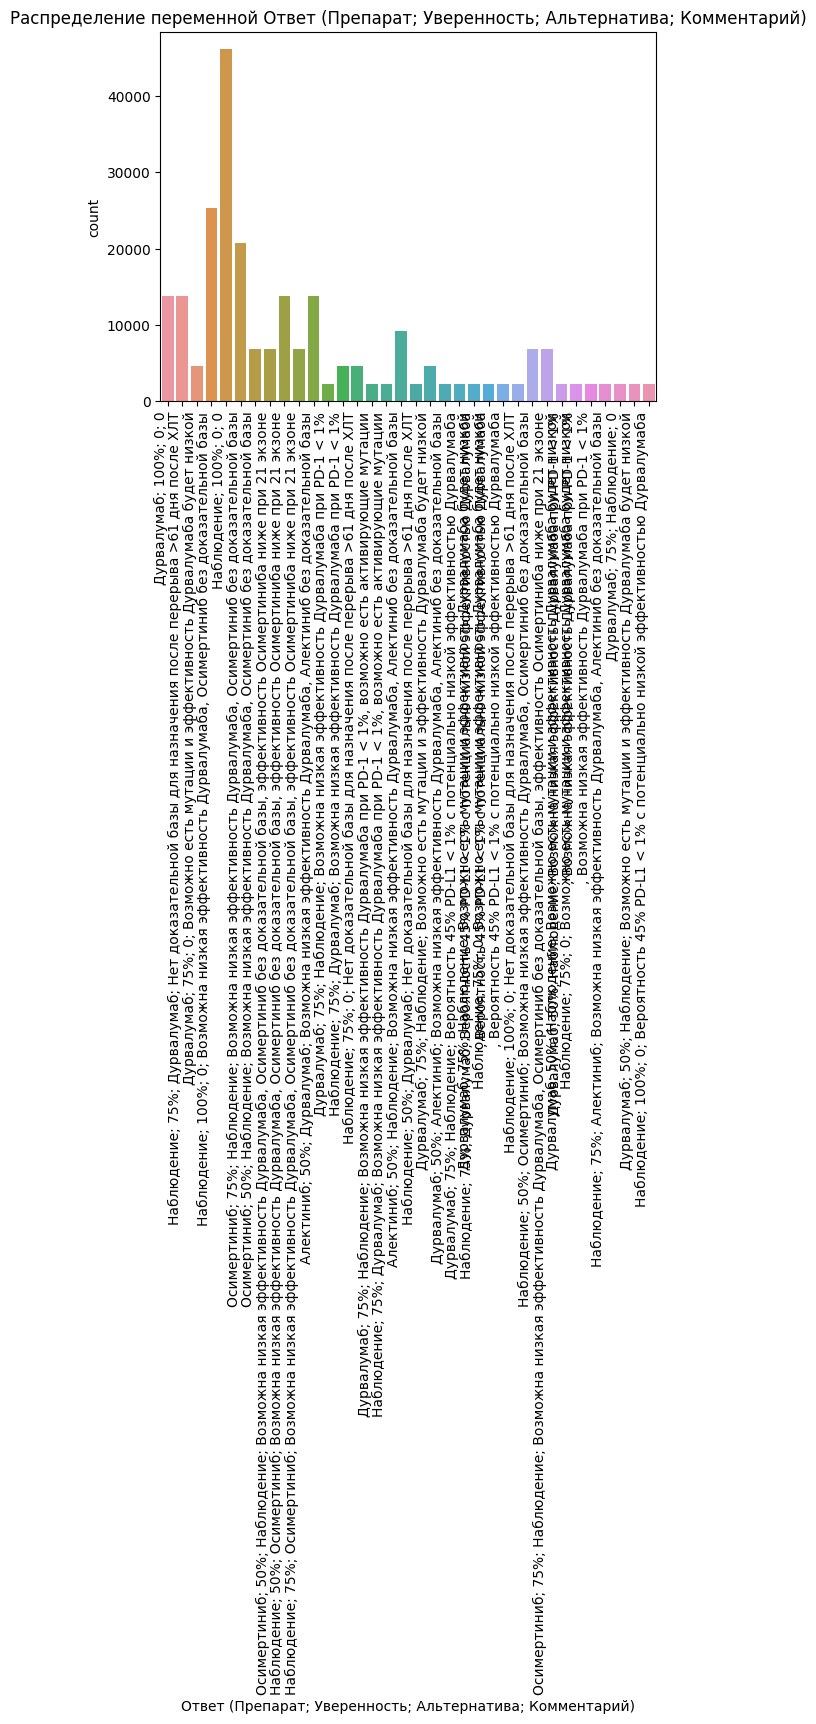

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Визуализация общей информации о данных
print(data_copy.info())

# Вывод первых нескольких строк датасета
print(data_copy.head())

# Построение гистограмм для числовых столбцов
#numeric_columns = data.select_dtypes(include=['int64', 'float64'])
#numeric_columns.hist(bins=20, figsize=(12, 8))
#plt.show()

# Построение гистограмм для числовых столбцов
numeric_columns = data_copy.select_dtypes(include=['int64', 'float64'])
for column in numeric_columns.columns:
    numeric_columns[column].hist(bins=20, figsize=(12, 8))
    plt.title(f'Гистограмма переменной {column}')
    plt.show()

# Построение корреляционной матрицы
# Получите список всех категориальных столбцов (по типу 'object')
categorical_columns = data_copy.select_dtypes(include=['object'])

# Создайте пустую корреляционную матрицу
correlation_matrix = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Заполните корреляционную матрицу значениями коэффициента Хи-квадрат
'''
for column1 in categorical_columns.columns:
    for column2 in categorical_columns.columns:
        if column1 != column2:
            cross_tab = pd.crosstab(data[column1], data[column2])
            chi2, _, _, _ = stats.chi2_contingency(cross_tab)
            correlation_matrix.loc[column1, column2] = chi2
'''
for column1 in categorical_columns.columns:
    for column2 in categorical_columns.columns:
        if column1 != column2:
            cross_tab = pd.crosstab(data_copy[column1], data_copy[column2])
            chi2, _, _, _ = stats.chi2_contingency(cross_tab)
            n = cross_tab.values.sum()
            phi2 = chi2 / n
            r, k = cross_tab.shape
            phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
            r_corr = r - ((r - 1) ** 2) / (n - 1)
            k_corr = k - ((k - 1) ** 2) / (n - 1)
            correlation_matrix.loc[column1, column2] = np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))
# Визуализируйте корреляционную матрицу без аннотаций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=False, cmap='coolwarm', cbar=True)
plt.title('Корреляции между категориальными переменными')

plt.show()

# Построение графиков распределения категориальных переменных
categorical_columns = data_copy.select_dtypes(include=['object'])
for column in categorical_columns:
    ax = sns.countplot(data=data_copy, x=column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Вертикальное выравнивание
    plt.title(f'Распределение переменной {column}')
    plt.show()


In [22]:
np_data = data_copy.values # Получение данных из таблицы и их запись в массив np_data

In [23]:
# Вывод первых 5 элементов массива np_data
for i in range(5):
    print(np_data[i])

['Азиатская' ' Мужской' ' До 70' ' В настоящее время' ' 0-1' ' да' ' да'
 ' да' ' да' ' да' 'до 42 дней' ' нет мутаций' ' Не исследовался'
 ' Результативность лечения' 'Дурвалумаб; 100%; 0; 0']
['Азиатская' ' Мужской' ' До 70' ' В настоящее время' ' 0-1' ' да' ' да'
 ' да' ' да' ' да' 'от 43 до 60 дней' ' нет мутаций' ' Не исследовался'
 ' Результативность лечения' 'Дурвалумаб; 100%; 0; 0']
['Азиатская' ' Мужской' ' До 70' ' В настоящее время' ' 0-1' ' да' ' да'
 ' да' ' да' ' да' 'более 61 дня' ' нет мутаций' ' Не исследовался'
 ' Результативность лечения'
 'Наблюдение; 75%; Дурвалумаб; Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ']
['Азиатская' ' Мужской' ' До 70' ' В настоящее время' ' 0-1' ' да' ' да'
 ' да' ' да' ' да' 'до 42 дней' ' не исследовались' ' Не исследовался'
 ' Результативность лечения'
 'Дурвалумаб; 75%; 0; Возможно есть мутации и эффективность Дурвалумаба будет низкой']
['Азиатская' ' Мужской' ' До 70' ' В настоящее время' ' 0-1' ' да' ' да'

In [24]:
# Применяю ко всем данным OHE
df = pd.DataFrame(np_data)

# Применяем One Hot Encoding к каждому столбцу
df_encoded = pd.get_dummies(df)

# В результате получаем новый датафрейм с бинарными столбцами для каждой уникальной категории в каждом столбце
print(df_encoded)

        0_Азиатская  0_Другая  0_Европейская  1_ Женский  1_ Мужской  2_ >70  \
0                 1         0              0           0           1       0   
1                 1         0              0           0           1       0   
2                 1         0              0           0           1       0   
3                 1         0              0           0           1       0   
4                 1         0              0           0           1       0   
...             ...       ...            ...         ...         ...     ...   
248827            0         1              0           1           0       1   
248828            0         1              0           1           0       1   
248829            0         1              0           1           0       1   
248830            0         1              0           1           0       1   
248831            0         1              0           1           0       1   

        2_ До 70  3_ В настоящее время 

In [33]:
X = df_encoded.iloc[:,0:14]  #независимые столбцы
y = df_encoded.iloc[:,-1]    #целевой столбец

In [34]:
print(X)

        0_Азиатская  0_Другая  0_Европейская  1_ Женский  1_ Мужской  2_ >70  \
0                 1         0              0           0           1       0   
1                 1         0              0           0           1       0   
2                 1         0              0           0           1       0   
3                 1         0              0           0           1       0   
4                 1         0              0           0           1       0   
...             ...       ...            ...         ...         ...     ...   
248827            0         1              0           1           0       1   
248828            0         1              0           1           0       1   
248829            0         1              0           1           0       1   
248830            0         1              0           1           0       1   
248831            0         1              0           1           0       1   

        2_ До 70  3_ В настоящее время 

In [32]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
248827    0
248828    0
248829    0
248830    0
248831    0
Name: 14_Осимертиниб; 75%; Наблюдение; Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне, Length: 248832, dtype: uint8


In [169]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                               Specs  Score
0                                     Раса_Азиатская    0.0
1                                        Раса_Другая    0.0
2                                   Раса_Европейская    0.0
3                                       Пол_ Женский    0.0
4                                       Пол_ Мужской    0.0
5                                       Возраст_ >70    0.0
6                                     Возраст_ До 70    0.0
7                  Статус курения_ В настоящее время    0.0
8  Статус курения_ Курение в прошлом (бросил боле...    0.0
9  Статус курения_ Курение в прошлом (бросил боле...    0.0


[ 0.155     0.168125  0.170625 -0.       -0.       -0.       -0.
  0.155625  0.185     0.165625 -0.       -0.       -0.       -0.      ]


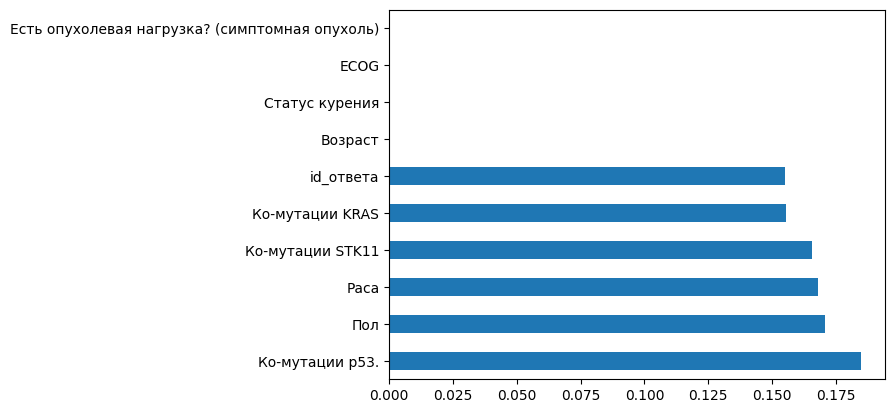

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# Есть объекты DataFrame df_encoded_X и df_encoded_y для признаков и меток соответственно

# Преобразование массивов numpy в тензоры PyTorch
X = torch.Tensor(X)
y = torch.LongTensor(y)
# Разделяем данные на тренировочную, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделяем оставшиеся данные на валидационную и тестовую выборки
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Теперь у нас есть тренировочные, валидационные и тестовые данные в соотношении 80/10/10

In [45]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Создание загрузчиков данных
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
'''
# Определение архитектуры нейросети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(14, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 34)  # 34 класса

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализация модели, функции потерь и оптимизатора
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение нейросети
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Оценка модели на тестовой выборке
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Точность на тестовой выборке: {accuracy}%")
'''

Epoch 1, Loss: 0.151673851368577
Epoch 2, Loss: 0.1285725698627625
Epoch 3, Loss: 0.1283714060247428
Epoch 4, Loss: 0.12827752751685326
Epoch 5, Loss: 0.1280860821056389
Epoch 6, Loss: 0.12805049406913593
Epoch 7, Loss: 0.12790014877004116
Epoch 8, Loss: 0.12792877043674936
Epoch 9, Loss: 0.12789900595222264
Epoch 10, Loss: 0.12776791339495278
Точность на тестовой выборке: 97.33563735733804%


Epoch 1, Loss: 0.14910275279012922
Epoch 2, Loss: 0.12885147066650973
Epoch 3, Loss: 0.12855983238005056
Epoch 4, Loss: 0.12826525197343136
Epoch 5, Loss: 0.1279946299831403
Epoch 6, Loss: 0.12803855997174068
Epoch 7, Loss: 0.1279882595747738
Epoch 8, Loss: 0.12797158718832397
Epoch 9, Loss: 0.12793614063382014
Epoch 10, Loss: 0.12791077672838877
Epoch 1, Loss: 0.1347631645407084
Epoch 2, Loss: 0.12829464364213716
Epoch 3, Loss: 0.12775102945667913
Epoch 4, Loss: 0.12759831078872635
Epoch 5, Loss: 0.1274810094459384
Epoch 6, Loss: 0.12746981900318263
Epoch 7, Loss: 0.1274563400760384
Epoch 8, Loss: 0.1274593938615057
Epoch 9, Loss: 0.12748015046775896
Epoch 10, Loss: 0.1274324336206844
Epoch 1, Loss: 0.13174565214806241
Epoch 2, Loss: 0.12846982739632276
Epoch 3, Loss: 0.12830896836495054
Epoch 4, Loss: 0.12838439750765027
Epoch 5, Loss: 0.12832801817215522
Epoch 6, Loss: 0.12832360797657802
Epoch 7, Loss: 0.12854631488639245
Epoch 8, Loss: 0.12827561496377077
Epoch 9, Loss: 0.12828273

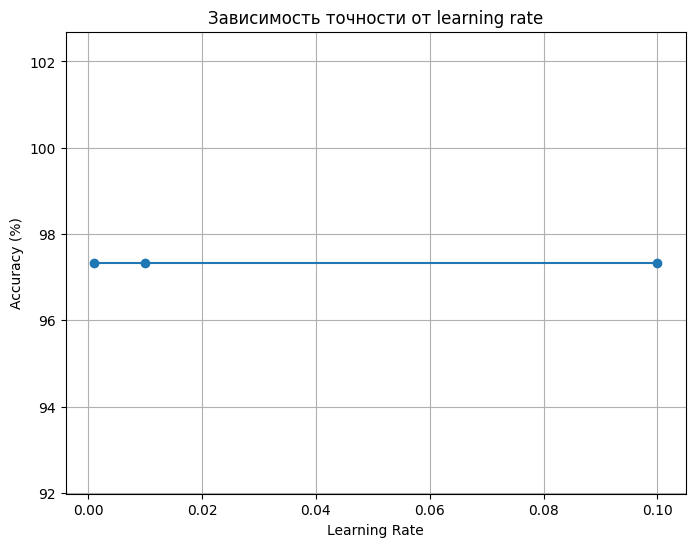

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    return train_losses

# Проведение экспериментов с разными гиперпараметрами
learning_rates = [0.001, 0.01, 0.1]
num_epochs = 10
results = []

for lr in learning_rates:
    model = Net()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Оценка модели на тестовой выборке
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results.append({'Learning Rate': lr, 'Accuracy': accuracy})

# Создание и отображение таблицы результатов
results_df = pd.DataFrame(results)
print(results_df)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, results_df['Accuracy'], marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Зависимость точности от learning rate')
plt.grid(True)
plt.show()


In [55]:
# Визуализация структуры нейросети с использованием TensorBoard
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Запуск TensorBoard для просмотра графа нейросети
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1, Loss: 0.14031361008309676
Точность на тестовой выборке: 97.33563735733804%
Epoch 2, Loss: 0.12847457176232774
Точность на тестовой выборке: 97.33563735733804%
Epoch 3, Loss: 0.12825113866002738
Точность на тестовой выборке: 97.33563735733804%
Epoch 4, Loss: 0.12817549439657014
Точность на тестовой выборке: 97.33563735733804%
Epoch 5, Loss: 0.12804616297514512
Точность на тестовой выборке: 97.33563735733804%
Epoch 6, Loss: 0.12793882466580797
Точность на тестовой выборке: 97.33563735733804%
Epoch 7, Loss: 0.12781352628012851
Точность на тестовой выборке: 97.33563735733804%
Epoch 8, Loss: 0.12780617487947238
Точность на тестовой выборке: 97.33563735733804%
Epoch 9, Loss: 0.12776128885457033
Точность на тестовой выборке: 97.33563735733804%
Epoch 10, Loss: 0.12775028780374598
Точность на тестовой выборке: 97.33563735733804%
Epoch 1, Loss: 0.15040355141067172
Точность на тестовой выборке: 97.33563735733804%
Epoch 2, Loss: 0.12874639518582928
Точность на тестовой выборке: 97.3356373

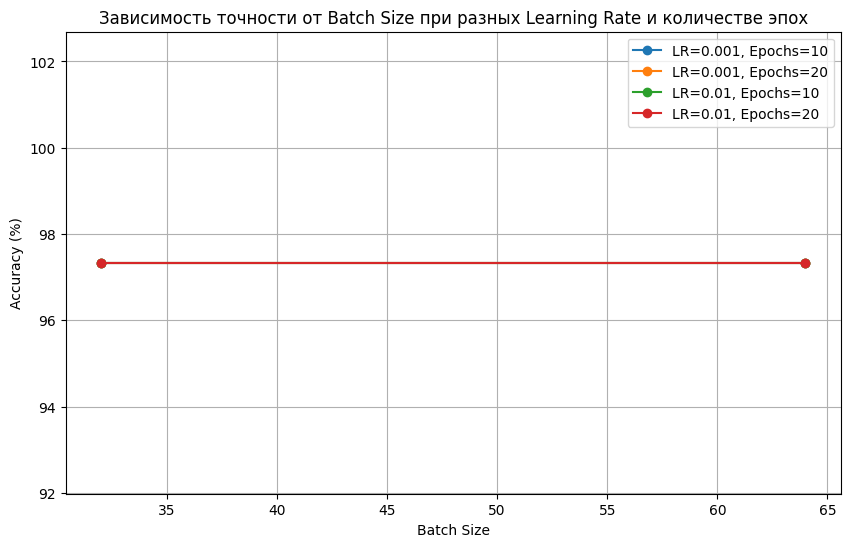

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
best_accuracy = 0
best_model = None
'''
# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        #000
            # Оценка модели на тестовой выборке
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовой выборке: {accuracy}%")

    # Сохранение модели с лучшими параметрами
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model.state_dict()

# Сохранение модели с лучшими параметрами в файл
torch.save(best_model, 'best_model.pth')
        #000
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    return train_losses
'''
# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    train_losses = []

    best_accuracy = 0  # Инициализация переменной для лучшей точности
    best_model = None  # Инициализация переменной для лучшей модели

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

        # Оценка модели на тестовой выборке
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Точность на тестовой выборке: {accuracy}%")

        # Сохранение модели с лучшими параметрами
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model.state_dict()

    # Сохранение модели с лучшими параметрами в файл
    torch.save(best_model, 'best_model.pth')

    return train_losses
# Списки значений для экспериментов
learning_rates = [0.001, 0.01]
num_epochs_list = [10, 20]
batch_sizes = [32, 64]
results = []
# Создание DataLoader для train_data и test_data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for lr in learning_rates:
    for num_epochs in num_epochs_list:
        for batch_size in batch_sizes:
            model = Net()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Изменение размера batch size
            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

            # Оценка модели на тестовой выборке
            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    outputs = model(inputs)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            results.append({'Learning Rate': lr, 'Num Epochs': num_epochs, 'Batch Size': batch_size, 'Accuracy': accuracy})

# Создание и отображение таблицы результатов
results_df = pd.DataFrame(results)
print(results_df)

# Визуализация результатов
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    for num_epochs in num_epochs_list:
        df = results_df[(results_df['Learning Rate'] == lr) & (results_df['Num Epochs'] == num_epochs)]
        plt.plot(df['Batch Size'], df['Accuracy'], marker='o', label=f'LR={lr}, Epochs={num_epochs}')

plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('Зависимость точности от Batch Size при разных Learning Rate и количестве эпох')
plt.grid(True)
plt.legend()
plt.show()
